In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn import preprocessing

In [2]:
data = pd.read_csv('./Road.csv/Road.csv')

In [3]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
data.shape

(12316, 32)

In [5]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [8]:
#Dropping NAN values
data.dropna(inplace=True)

In [9]:
data['Age_band_of_driver'].unique()

array(['18-30', '31-50', 'Over 51', 'Unknown', 'Under 18'], dtype=object)

In [10]:
data['Casualty_severity'].unique()

array(['3', 'na', '2', '1'], dtype=object)

In [11]:
data['Driving_experience'].unique()

array(['Above 10yr', '1-2yr', '5-10yr', 'Below 1yr', '2-5yr',
       'No Licence', 'unknown'], dtype=object)

In [12]:
data['Pedestrian_movement'].unique()

array(["Crossing from driver's nearside", 'Not a Pedestrian',
       'Unknown or other',
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Walking along in carriageway, back to traffic',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [13]:
data['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [14]:
data['Cause_of_accident'].unique()

array(['Changing lane to the right', 'Moving Backward', 'No distancing',
       'No priority to vehicle', 'Overtaking', 'Other',
       'No priority to pedestrian', 'Changing lane to the left',
       'Driving carelessly', 'Turnover', 'Driving to the left',
       'Driving at high speed', 'Driving under the influence of drugs',
       'Getting off the vehicle improperly', 'Overturning', 'Overspeed',
       'Overloading', 'Improper parking', 'Drunk driving', 'Unknown'],
      dtype=object)

In [15]:
data['Time']

8        17:20:00
9        17:20:00
12       17:45:00
13       17:45:00
14       17:45:00
           ...   
12302    17:25:00
12303    12:48:00
12313    13:55:00
12314    13:55:00
12315    13:55:00
Name: Time, Length: 2889, dtype: object

In [16]:
#Modifying Time to required format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data['hour'] = data['Time'].dt.hour
data['minute'] = data['Time'].dt.minute

In [17]:
data = data.drop(['Time','Educational_level','Vehicle_driver_relation','Owner_of_vehicle','Service_year_of_vehicle','Number_of_casualties','Work_of_casuality'],axis = 1)

In [18]:
def label_encode_columns(data, columns_to_encode):
    label_encoder = preprocessing.LabelEncoder()
    for column in columns_to_encode:
        data[column] = label_encoder.fit_transform(data[column])

columns_to_encode = [
    'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Driving_experience',
    'Type_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
    'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
    'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
    'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved',
    'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
    'Age_band_of_casualty', 'Casualty_severity', 'Fitness_of_casuality',
    'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'
]

label_encode_columns(data, columns_to_encode)

<Axes: >

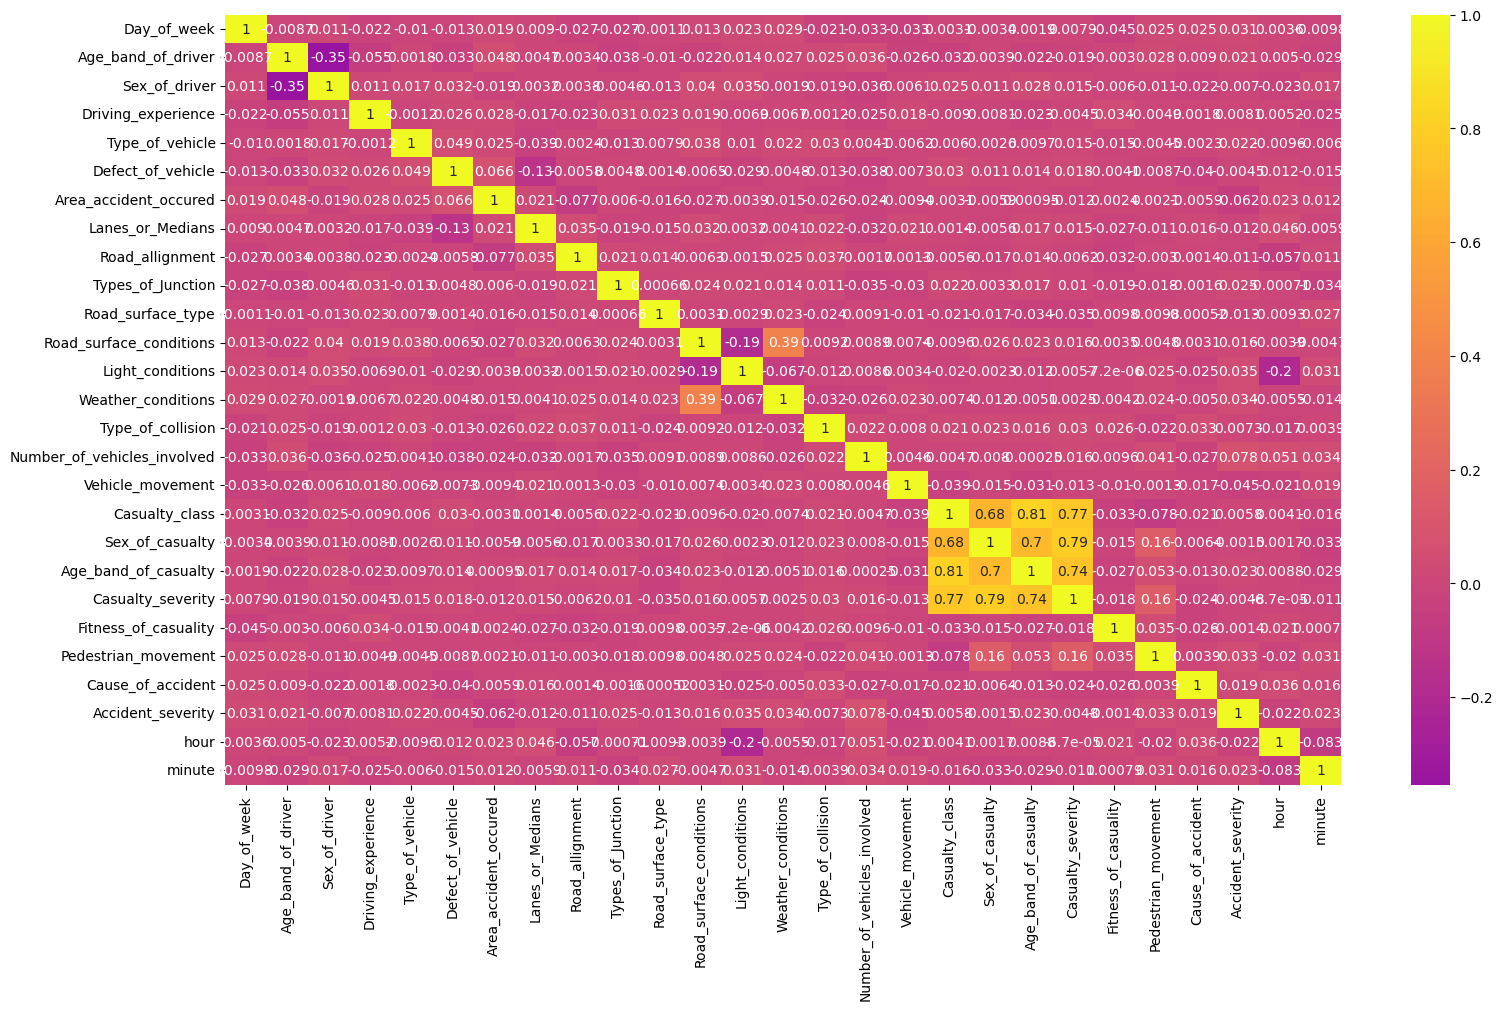

In [19]:
corr_matrix=data.corr()
plt.figure(1, figsize=(18,10))
sns.heatmap(corr_matrix, cmap='plasma', center=0, annot=True)

In [20]:
X = data.drop(['Accident_severity'],axis =1)
Y = data['Accident_severity']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=13)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RForest_clf = RandomForestClassifier(n_estimators = 100)
RForest_clf.fit(X_train, y_train)
y_pred = RForest_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 85.71428571428571


In [22]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 85.71428571428571


In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 85.71428571428571


In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 85.71428571428571


In [25]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 85.25345622119815


Accuracy for Logistic Regression: 0.86
Accuracy for KNeighbors Classifier: 0.77
Accuracy for Random Forest: 0.86
Accuracy for Support Vector Machine: 0.86
Accuracy for XGBoost: 0.85


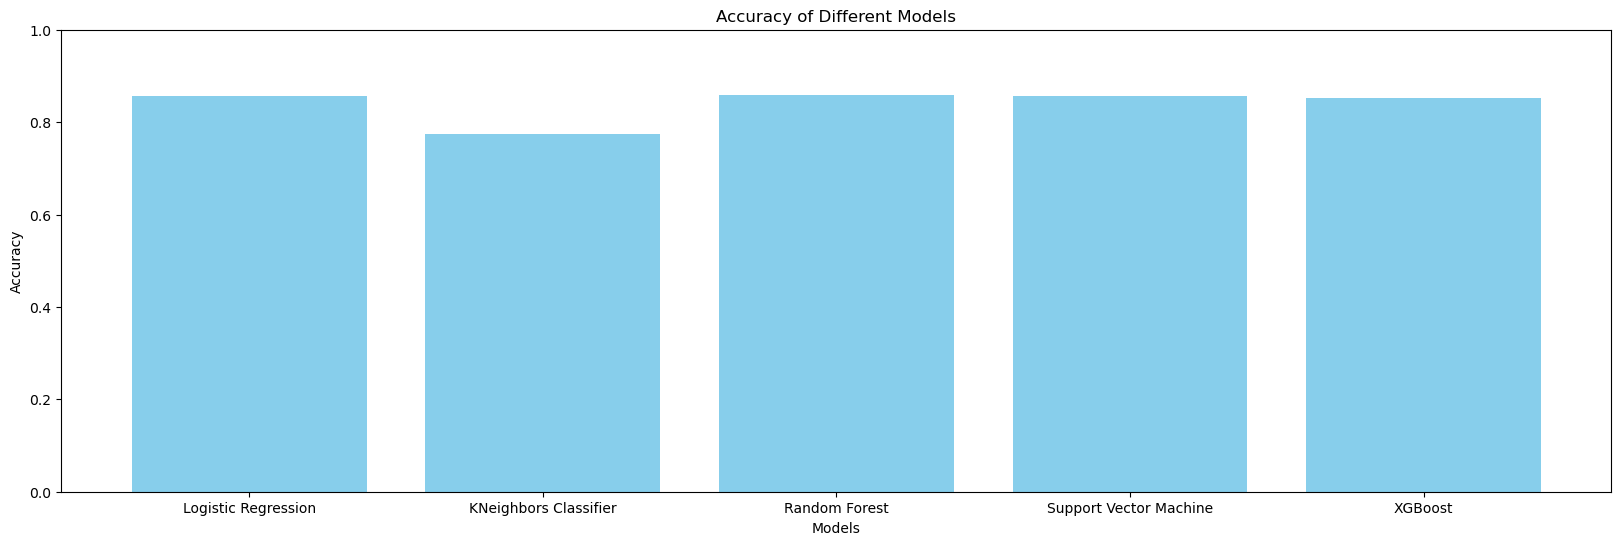

In [26]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNeighbors Classifier': tree.DecisionTreeClassifier(),
    'Random Forest' :  RandomForestClassifier(),
    'Support Vector Machine' : SVC(),
    'XGBoost' : xgb.XGBClassifier()
}

accuracies = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for {model_name}: {accuracy:.2f}')

# Create a bar plot for the accuracies
plt.figure(figsize=(20, 6))
plt.bar(models.keys(), accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0, 1])
plt.show()

In [32]:
user_input = {
    'Day_of_week': 1,
    'Age_band_of_driver': 2,
    'Sex_of_driver': 0,
    'Driving_experience': 3,
    'Type_of_vehicle': 4,
    'Defect_of_vehicle': 1,
    'Area_accident_occured': 2,
    'Lanes_or_Medians': 1,
    'Road_allignment': 0,
    'Types_of_Junction': 2,
    'Road_surface_type': 1,
    'Road_surface_conditions': 0,
    'Light_conditions': 1,
    'Weather_conditions': 2,
    'Type_of_collision': 1,
    'Number_of_vehicles_involved': 2,
    'Vehicle_movement': 0,
    'Casualty_class': 1,
    'Sex_of_casualty': 0,
    'Age_band_of_casualty': 2,
    'Casualty_severity': 0,  # Add a placeholder value
    'Fitness_of_casuality': 1,
    'Pedestrian_movement': 0,
    'Cause_of_accident': 3,
    'hour': 14,
    'minute': 30,
}

# Convert the user input to a DataFrame
user_input_df = pd.DataFrame([user_input])

# Apply label encoding to the user input
# label_encode_columns(user_input_df, columns_to_encode)

# Predict using RandomForestClassifier
rf_prediction = RForest_clf.predict(user_input_df)
print(f'Random Forest Prediction: {rf_prediction[0]}')

xgb_prediction = xgb_classifier.predict(user_input_df)
print(f'XGB classifier: {xgb_prediction[0]}')

# Predict using Support Vector Machine (SVM)
svm_prediction = model.predict(user_input_df)
print(f'SVM Prediction: {svm_prediction[0]}')


Random Forest Prediction: 2
XGB classifier: 2
SVM Prediction: 2


In [34]:
# Create a dictionary to store user input
user_input = {
    'Day_of_week': int(input('Enter Day_of_week: ')),
    'Age_band_of_driver': int(input('Enter Age_band_of_driver: ')),
    'Sex_of_driver': int(input('Enter Sex_of_driver (0 for male, 1 for female): ')),
    'Driving_experience': int(input('Enter Driving_experience: ')),
    'Type_of_vehicle': int(input('Enter Type_of_vehicle: ')),
    'Defect_of_vehicle': int(input('Enter Defect_of_vehicle: ')),
    'Area_accident_occured': int(input('Enter Area_accident_occured: ')),
    'Lanes_or_Medians': int(input('Enter Lanes_or_Medians: ')),
    'Road_allignment': int(input('Enter Road_allignment: ')),
    'Types_of_Junction': int(input('Enter Types_of_Junction: ')),
    'Road_surface_type': int(input('Enter Road_surface_type: ')),
    'Road_surface_conditions': int(input('Enter Road_surface_conditions: ')),
    'Light_conditions': int(input('Enter Light_conditions: ')),
    'Weather_conditions': int(input('Enter Weather_conditions: ')),
    'Type_of_collision': int(input('Enter Type_of_collision: ')),
    'Number_of_vehicles_involved': int(input('Enter Number_of_vehicles_involved: ')),
    'Vehicle_movement': int(input('Enter Vehicle_movement: ')),
    'Casualty_class': int(input('Enter Casualty_class: ')),
    'Sex_of_casualty': int(input('Enter Sex_of_casualty (0 for male, 1 for female): ')),
    'Age_band_of_casualty': int(input('Enter Age_band_of_casualty: ')),
    'Casualty_severity': int(input('Enter Casualty_severity: ')),  # Placeholder value
    'Fitness_of_casuality': int(input('Enter Fitness_of_casuality: ')),
    'Pedestrian_movement': int(input('Enter Pedestrian_movement: ')),
    'Cause_of_accident': int(input('Enter Cause_of_accident: ')),
    'hour': int(input('Enter hour: ')),
    'minute': int(input('Enter minute: ')),
}

# Convert the user input to a DataFrame
user_input_df = pd.DataFrame([user_input])

# Apply label encoding to the user input
# label_encode_columns(user_input_df, columns_to_encode)

# Predict using RandomForestClassifier
rf_prediction = RForest_clf.predict(user_input_df)
print(f'Random Forest Prediction: {rf_prediction[0]}')

# Predict using XGBoost classifier
xgb_prediction = xgb_classifier.predict(user_input_df)
print(f'XGB classifier: {xgb_prediction[0]}')

# Predict using Support Vector Machine (SVM)
svm_prediction = model.predict(user_input_df)
print(f'SVM Prediction: {svm_prediction[0]}')


Random Forest Prediction: 2
XGB classifier: 2
SVM Prediction: 2
